# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd

df = pd.read_csv('C:/data/human_body_temperature.csv')

In [128]:
# Your work here.

Question 1. Is the distribution of body temperatures normal?

Answer:<ul>
<li>
From the histogram, this distribution does not appear to be normally distributed. Most of the temperatures are 98.6$^{\circ}$F or below.<li>
My analysis based on 3 standard deviations from the mean also concurs with this.


HM Questions:<ul><ol>
<li>
For the histogram, what should the y-label be b/c I'm making this a pdf? 
<li>
Is my mathmatetical way correct?

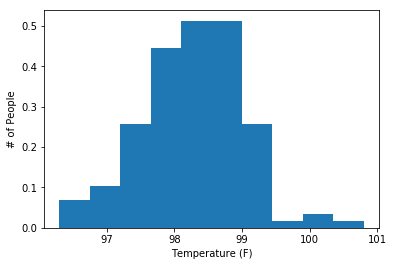

In [21]:
# Histogram
import matplotlib.pyplot as plt

#normed=True argument in a histogram makes it so the area of the histogram bars = 1
plt.hist(df['temperature'], normed=True)
plt.xlabel('Temperature (F)')
plt.ylabel('# of People')
plt.show()

In [124]:
# other way to check for normalcy from wikipedia. checking to see if max/min greater than 3 std's away from mean
# compares it to the 68–95–99.7 rule: if one has a 3σ event (properly, a 3s event) and substantially fewer than 300 samples, or a 4s event and substantially fewer than 15,000 samples, then a normal distribution will understate the maximum magnitude of deviations in the sample data.

import numpy as np
sample_std = np.std(df['temperature'])
sample_mean = np.mean(df['temperature'])


if sample_mean + 3*std < max(df['temperature']):
    print 'Dataset is not normal based on max'
    
if sample_mean - 3*std > min(df['temperature']):
    print 'Dataset is not normal based on min'    

Dataset is not normal based on max


Question 2. Is the sample size large? Are the observations independent?

Answer:<ul><li>
Yes it is large b/c the # of observations is 130 which is greater than 30. <li>
Yes the observations are independent b/c one person's body temperature has no impact on another person's body temperature.

HM Questions:<ul><ol>
<li>
Are the above answers right?

In [3]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

Question 3. Is the true population mean really 98.6 degrees F?

Answer:<ul><li>
For #1, yes it is <li>
For #2, you would use a 2 sided test. This is because you're not saying if the sampled mean is greater than or if it less than, you're saying that the sampled mean is not equal to the mean.  Yes the observations are independent b/c one person's body temperature has no impact on another person's body temperature.<li>
For #3, you must know the standard deviation of the population and your sample size should be above 30 in order for you to be able to use the z-score. We know the standard deviation of the population and the sample is > 30. <li>
For #4, the p-value is low, and the mean of the bootstrapped sample is statistically significantly different than the true, population mean of 98.6. The results are different b/c you're using the standard deviation of the bootstrapped sample in your calculation as well as factoring in the size of your sample. This may give you more certainty that the mean is not the same as the true, population mean as is in this case.


HM Questions:<ul><ol>
<li>
For #1, what should my bootstrap sample size be? Is 10k fine? 
<li>
For #1, should I have generated a bootstrap replicate array for to answer this? I did not. I just used bootstrap sample
<li>
For #1, is how I found the p-value correct?
<li>
For #1 & #2, doesn't the bootstrap test need the frequentist test as part of it? This is confusing...
<li>
For #4, is the "other" test they're referring to a t test? If so, is my answer correct?


In [4]:
#First, try a bootstrap hypothesis test. using z value. 

In [120]:
import numpy as np
import scipy.stats as st
true_population_mean = 98.6
bs_sample = np.random.choice(df['temperature'], size=10000)
bs_sample_mean = np.mean(bs_sample)
bs_sample_std = np.std(bs_sample)

print 'the bs_sample mean is ', bs_sample_mean
print 'the bs_sample std is ', bs_sample_std

# i believe you use your sample's std here based on my note (Question 3) + the zscore
z = (bs_sample_mean - true_population_mean) / sample_std
p_values = st.norm.sf(abs(z))*2

print 'the z-score is', z
print 'the p-value is', p_values


# can also say that bs_sample_mean falls within 1 standard deviation of the mean
print 'sample mean falls within 1 std of true mean: ', true_population_mean - bs_sample_std < bs_sample_mean
print 'sample mean falls within 1 std of true mean: ', true_population_mean + bs_sample_std > bs_sample_mean

the bs_sample mean is  98.26154
the bs_sample std is  0.737855560662
the z-score is -0.463416711338
the p-value is 0.643065702446
sample mean falls within 1 std of true mean:  True
sample mean falls within 1 std of true mean:  True


In [ ]:
# using t score instead of z score. p-value is small. reject null hypothesis that the means are the same

In [121]:
t = (bs_sample_mean - true_population_mean) / (bs_sample_std / np.sqrt(len(bs_sample)))
p_values_t = st.norm.sf(abs(t))*2

print 'the t-score is', t
print 'the p-value is', p_values_t

the t-score is -45.8707663186
the p-value is 0.0


Question 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

Answer:<ul><li>
For #1, the t test is correct to use b/c the sample size is < 30. <li>
For #2, I notice that now you would not reject the null hypothesis using the t statistic whereas in problem 3, with a sample size of 10k, you would. This shows me that the sample size has a big impact on the t statistic - which makes sense given that it's in the denominator. 


HM Questions:<ul><ol>
<li>
Correct?


In [122]:
import numpy as np
import scipy.stats as st
true_population_mean = 98.6
bs_sample_10 = np.random.choice(df['temperature'], size=10)
bs_sample_mean_10 = np.mean(bs_sample_10)
bs_sample_std_10 = np.std(bs_sample_10)

print 'the bs_sample mean is ', bs_sample_mean_10
print 'the bs_sample std is ', bs_sample_std_10

# i believe you use your sample's std here based on my note (Question 3) + the zscore
z = (bs_sample_mean_10 - true_population_mean) / sample_std
p_values = st.norm.sf(abs(z))*2

print 'the z-score is', z
print 'the p-value is', p_values


# can also say that bs_sample_mean falls within 1 standard deviation of the mean
print 'sample mean falls within 1 std of true mean: ', true_population_mean - bs_sample_std_10 < bs_sample_mean_10
print 'sample mean falls within 1 std of true mean: ', true_population_mean + bs_sample_std_10 > bs_sample_mean_10

the bs_sample mean is  98.4
the bs_sample std is  0.458257569496
the z-score is -0.273838392329
the p-value is 0.784208818085
sample mean falls within 1 std of true mean:  True
sample mean falls within 1 std of true mean:  True


In [ ]:
# using t score instead of z score. 

In [123]:
t = (bs_sample_mean_10 - true_population_mean) / (bs_sample_std_10 / np.sqrt(len(bs_sample_10)))
p_values_t = st.norm.sf(abs(t))*2

print 'the t-score is', t
print 'the p-value is', p_values_t

the t-score is -1.38013111868
the p-value is 0.167546277489


Question 5. At what temperature should we consider someone's temperature to be "abnormal"?

Answer:<ul><li>
For #1, Using the initial sample and a 95% confidence interval, you would consider someone's temperature to be "abnormal" at 96.72 and 99.47 degrees F.


HM Questions:<ul><ol>
<li>
Correct?
<li>
Same as for the 2nd question. Here I'm not resampling the data, but doesnt the bootstrapping data need to go through the same tests?

In [127]:
import numpy as np
# 95% confidence interval
conf_int = np.percentile(df['temperature'], [2.5, 97.5])
print conf_int

[ 96.7225  99.4775]


Question 6. Is there a significant difference between males and females in normal temperature?

Answer:<ul><li>
For #1, I used a hypothesis test comparing the bootstrappted replicates of the sampled data for males and females. B/c the p-value is 0, yes there it is statistically significant that the means of males and females are not equal.  


HM Questions:<ul><ol>
<li>
Correct?
<li>
On the last part, why can't i do len(bs_diff_replicates)? I'm assuming here is where i needed to actually recreate the functions like in datacamp. Can we walk through how to do this last one?
<li>
Does this have something to do with the Datacamp function draw_bs_reps below? This was not used in my analysis

In [158]:
import numpy as np
import scipy.stats as st
females = df[df['gender']=='F']
males = df[df['gender']=='M']

females_sample_mean = np.mean(females['temperature'])
males_sample_mean = np.mean(males['temperature'])

females_bs_sample = np.random.choice(females['temperature'], size=10000)
females_bs_sample_mean = np.mean(females_bs_sample)
females_bs_sample_std = np.std(females_bs_sample)

males_bs_sample = np.random.choice(males['temperature'], size=10000)
males_bs_sample_mean = np.mean(males_bs_sample)
males_bs_sample_std = np.std(males_bs_sample)


print 'the females_bs_sample mean is ', females_bs_sample_mean
print 'the males_bs_sample std is ', males_bs_sample_mean

bs_diff_replicates = females_bs_sample_mean - males_bs_sample_mean
mean_diff = 0  # null hypothesis is that there's no difference b/t male and female body temp
#p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)   <--- this does not work
p = np.sum(bs_diff_replicates >= mean_diff) / len(males)
print 'the p-value is ', p

the females_bs_sample mean is  98.39863
the males_bs_sample std is  98.10544
the p-value is  0


In [ ]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
